<a href="https://colab.research.google.com/github/BriannaSolano/RoboticsAndComputerVision/blob/main/Homework2_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A =  [[-1.330000e+02 -4.455000e+02 -1.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  1.795500e+04  6.014250e+04  1.350000e+02]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 -1.330000e+02 -4.455000e+02
  -1.000000e+00  7.448000e+04  2.494800e+05  5.600000e+02]
 [-6.010000e+02 -5.665000e+02 -1.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  3.696150e+05  3.483975e+05  6.150000e+02]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 -6.010000e+02 -5.665000e+02
  -1.000000e+00  3.359590e+05  3.166735e+05  5.590000e+02]
 [-1.730000e+02 -1.135000e+02 -1.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  2.318200e+04  1.520900e+04  1.340000e+02]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 -1.730000e+02 -1.135000e+02
  -1.000000e+00  2.076000e+04  1.362000e+04  1.200000e+02]
 [-6.180000e+02 -1.095000e+02 -1.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00  3.806880e+05  6.745200e+04  6.160000e+02]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 -6.180000e+02 -1.095000e+02
  -1.0

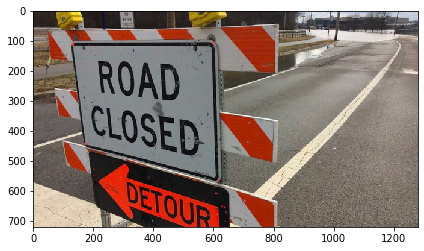

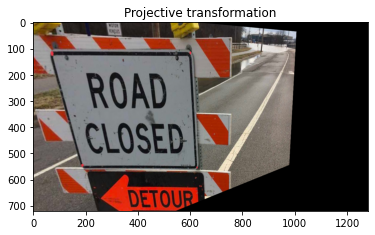

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage import data
from skimage import transform
from skimage import img_as_float

img = imread('original.jpg')


imshow(img);
#original points
x = [133,601,173,618]
y = [445.5,566.5,113.5,109.5]
#New points
newx = [135,615,134,616]
newy = [560,559,120,118]

A = np.array ([[-x[0],-y[0],-1,0,0,0,(newx[0]*x[0]),(newx[0]*y[0]),newx[0]],
               [0,0,0,-x[0],-y[0],-1,(newy[0]*x[0]),(newy[0]*y[0]),newy[0]],
               [-x[1],-y[1],-1,0,0,0,(newx[1]*x[1]),(newx[1]*y[1]),newx[1]],
               [0,0,0,-x[1],-y[1],-1,(newy[1]*x[1]),(newy[1]*y[1]),newy[1]],
               [-x[2],-y[2],-1,0,0,0,(newx[2]*x[2]),(newx[2]*y[2]),newx[2]],
              [0,0,0,-x[2],-y[2],-1,(newy[2]*x[2]),(newy[2]*y[2]),newy[2]],
               [-x[3],-y[3],-1,0,0,0,(newx[3]*x[3]),(newx[3]*y[3]),newx[3]],
                [0,0,0,-x[3],-y[3],-1,(newy[3]*x[3]),(newy[3]*y[3]),newy[3]]
               ])
print("A = ", A)
print(" ")

U, s, V = np.linalg.svd(A)
V = np.transpose(V)
print("V = ", V)
print(" ")

#Elements in the Homography
H = V[:,[8]]
print ("Elements in the homography")
print(H)
print(" ")
#Reshape the Homography
matrix = np.reshape(H,(3,3))
print("Homography = ")
print(matrix)

#Test the homography on the image
tform = transform.ProjectiveTransform(matrix=matrix)
tf_img = transform.warp(img, tform.inverse)
fig, ax = plt.subplots()
ax.imshow(tf_img)
ax.set_title('Projective transformation')
plt.show()


